In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Loading the dataset

In [136]:
# read spambase data file into a dataframe
df = pd.read_csv("data/spambase.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [137]:
# rename the target column
df.rename(columns={57:'spam'}, inplace=True)
display(df.head())
print(f"The Dataset consists of {df.shape[1]} features & {df.shape[0]} samples.")

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The Dataset consists of 58 features & 4601 samples.


# Exploratory Data Analysis

In [138]:
# checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [139]:
# checking the stats of each column
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


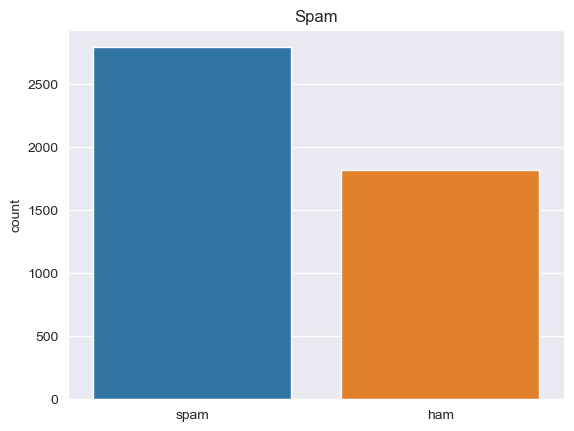

In [140]:
# visualizing the target column
vis_spam = df.loc[:,"spam"].values
target_plot = sns.countplot(x=vis_spam)
target_plot.set_xticklabels(["spam", "ham"])

plt.title("Spam")
plt.show()

The target column has a data imbalance which will be addressed

# Data Preprocessing

In [141]:
# removal of duplicated values
df_copy = df.copy()
df = df.drop_duplicates()
print(f"Number of duplicates dropped: {df_copy.shape[0] - df.shape[0]}")

Number of duplicates dropped: 391


In [142]:
# check for null values
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
spam    0
dtype: int64

no null values found in the dataset

In [143]:
#TODO: checking for outliers


False

## Fixing data imbalance

In [144]:
# make x the orig df without target column and y the values of the target column
x = df.drop(["spam"], axis=1)
y = df.loc[:, "spam"].values

In [145]:
# correct data imbalances by using SMOTE technique to duplicate values and fit_resample to resample minority classes.
sm = SMOTE(random_state = 39)
print("Original Dataset Shape %s" % Counter(y))
x, y = sm.fit_resample(x, y)
print("Resampled Dataset Shape %s" % Counter(y))

Original Dataset Shape Counter({0: 2531, 1: 1679})
Resampled Dataset Shape Counter({1: 2531, 0: 2531})


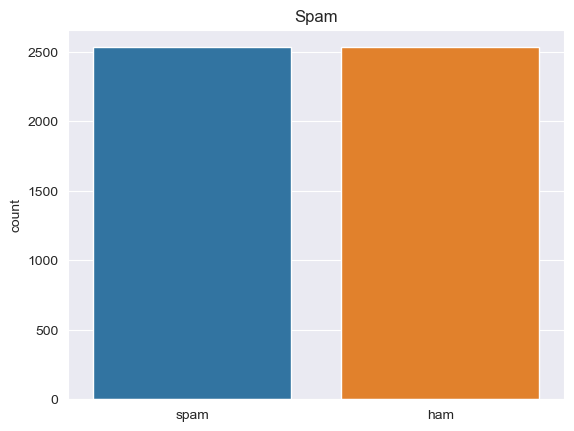

In [146]:
# plot of classes after resampling.
target_plot = sns.countplot(x=y)
target_plot.set_xticklabels(["spam", "ham"])

plt.title("Spam")
plt.show()

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4210 non-null   float64
 1   1       4210 non-null   float64
 2   2       4210 non-null   float64
 3   3       4210 non-null   float64
 4   4       4210 non-null   float64
 5   5       4210 non-null   float64
 6   6       4210 non-null   float64
 7   7       4210 non-null   float64
 8   8       4210 non-null   float64
 9   9       4210 non-null   float64
 10  10      4210 non-null   float64
 11  11      4210 non-null   float64
 12  12      4210 non-null   float64
 13  13      4210 non-null   float64
 14  14      4210 non-null   float64
 15  15      4210 non-null   float64
 16  16      4210 non-null   float64
 17  17      4210 non-null   float64
 18  18      4210 non-null   float64
 19  19      4210 non-null   float64
 20  20      4210 non-null   float64
 21  21      4210 non-null   float64
 22  

## Data Split

In [148]:
# test/training data split
X = df.drop("spam",axis=1)
Y = df["spam"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=8)
print(f"Original Dataset: ({X.shape}, {Y.shape}) \nTraining Dataset: ({x_train.shape}, {y_train.shape}) \nTesting Dataset: ({x_test.shape}, {y_test.shape})")

Original Dataset: ((4210, 57), (4210,)) 
Training Dataset: ((3157, 57), (3157,)) 
Testing Dataset: ((1053, 57), (1053,))


## Data Standardization

In [149]:
# perform feature scaling on the training & testing data to standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Feature Selection

Here I tried using multiple feature selection methods and determined the best approach to go with based on the best evaluation metrics given after running each separately.

In [150]:
# uni-variate feature selection
# selector = SelectKBest(chi2, k=25)
# X_new = selector.fit_transform(X, Y)
# selected_features = X.columns[selector.get_support(indices=True)]
# print(selected_features)

# df = df.loc[:, selected_features]

In [151]:
# recursive feature selection
estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=25, step=1)
selector.fit(X,Y)
# Get the selected feature indices
selected_features = X.columns[selector.support_]

# Print the selected feature names
print(selected_features)
df = df.loc[:, selected_features]

Index([ 4,  5,  6,  9, 10, 11, 15, 16, 18, 20, 23, 24, 25, 26, 27, 35, 41, 44,
       45, 49, 51, 52, 54, 55, 56],
      dtype='object')


In [152]:
df.head()

,4,5,6,9,10,11,15,16,18,20,...,35,41,44,45,49,51,52,54,55,56
0,0.32,0.00,0.00,0.00,0.00,0.64,0.32,0.00,1.93,0.96,...,0.0,0.0,0.00,0.00,0.000,0.778,0.000,3.756,61,278
1,0.14,0.28,0.21,0.94,0.21,0.79,0.14,0.07,3.47,1.59,...,0.0,0.0,0.00,0.00,0.132,0.372,0.180,5.114,101,1028
2,1.23,0.19,0.19,0.25,0.38,0.45,0.06,0.06,1.36,0.51,...,0.0,0.0,0.06,0.06,0.143,0.276,0.184,9.821,485,2259
3,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,3.18,0.31,...,0.0,0.0,0.00,0.00,0.137,0.137,0.000,3.537,40,191
4,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,3.18,0.31,...,0.0,0.0,0.00,0.00,0.135,0.135,0.000,3.537,40,191


# Modelling

In [153]:
from sklearn.metrics import roc_curve, roc_auc_score


# creating a function to print the evaluation of a model
def evaluate(pred, pred_prob):
    print(f"Accuracy: {accuracy_score(y_test, pred)}\n")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n")
    print(f"Classification Report: \n{classification_report(y_test, pred)}\n")
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    auc = roc_auc_score(y_test, pred_prob)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## K Nearest Neighbor (KNN)

In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [158]:
knn_pred = knn.predict(x_test)
knn_pred_prob = knn.predict_proba(x_test)[:, 1]

C:\Users\misha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8755935422602089

Confusion Matrix: 
[[577  38]
 [ 93 345]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       615
           1       0.90      0.79      0.84       438

    accuracy                           0.88      1053
   macro avg       0.88      0.86      0.87      1053
weighted avg       0.88      0.88      0.87      1053




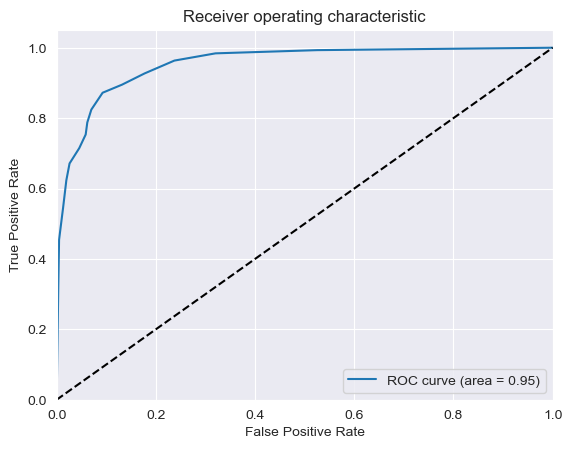

In [159]:
evaluate(knn_pred, knn_pred_prob)

## Decision Tree

In [164]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [165]:
dt_pred = dt.predict(x_test)
dt_pred_prob = dt.predict_proba(x_test)[:, 1]

Accuracy: 0.9050332383665717

Confusion Matrix: 
[[565  50]
 [ 50 388]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       615
           1       0.89      0.89      0.89       438

    accuracy                           0.91      1053
   macro avg       0.90      0.90      0.90      1053
weighted avg       0.91      0.91      0.91      1053




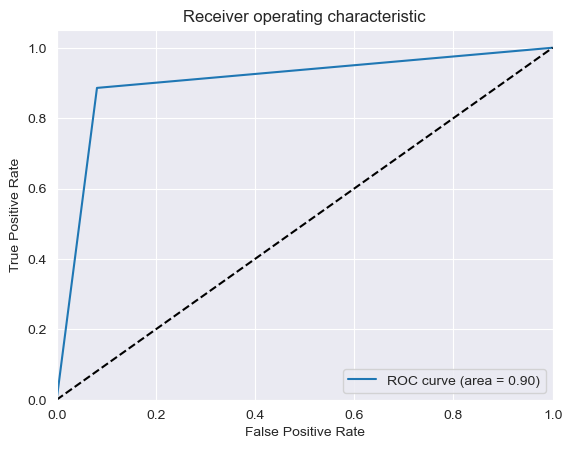

In [166]:
evaluate(dt_pred, dt_pred_prob)

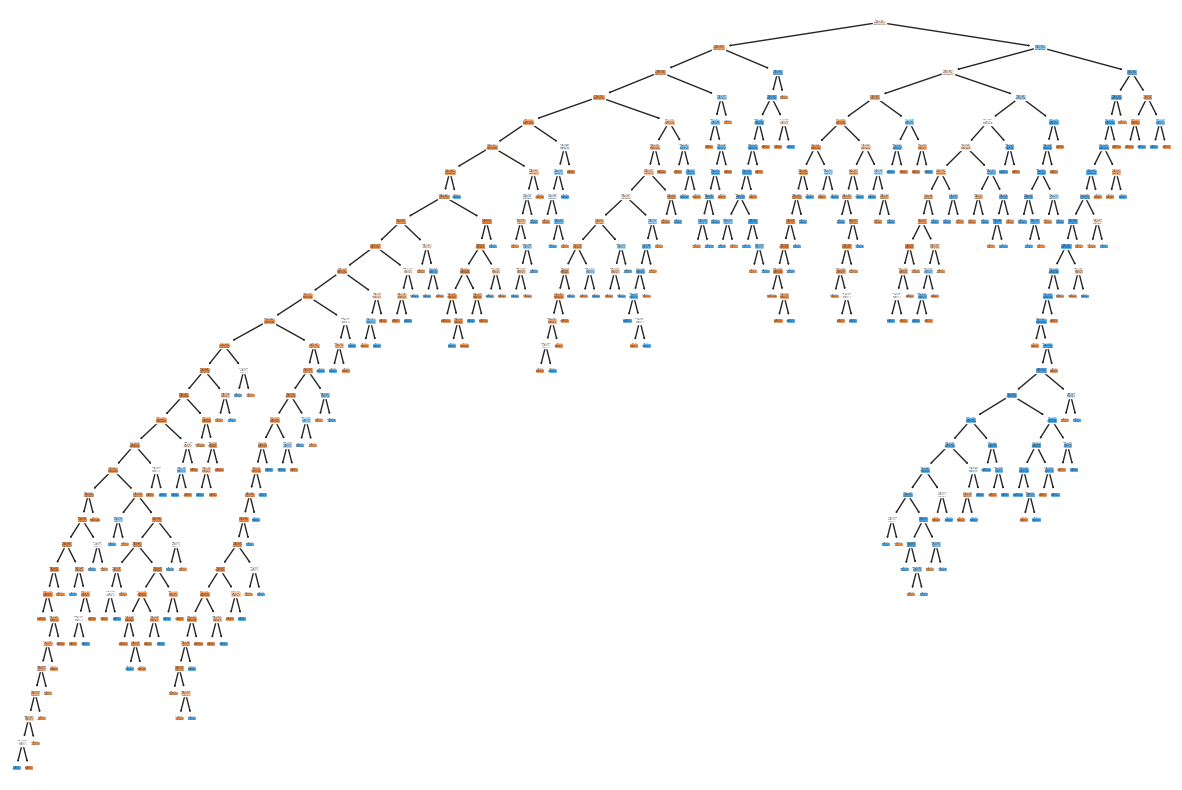

In [167]:
# visualizing the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()